In [67]:

import datetime
import os

import matplotlib.dates as mdates
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import benford
import pandas


def addStats(df):
    stats = df.describe(include='all')
    stats.loc['var'] = df.var().tolist()
    stats.loc['skew'] = df.skew().tolist()
    stats.loc['kurt'] = df.kurtosis().tolist()
    stats.loc['mad'] = df.mad().tolist()

    return stats

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
pandas.set_option('use_inf_as_na', True)

COVID_Raw = pandas.read_csv("./COVID_Raw.csv")
COVID_Raw['Date'] = pandas.to_datetime(COVID_Raw['Date'])
COVID_Raw = COVID_Raw.set_index('Date')
COVID_Raw[['Tested_Cum']] = COVID_Raw[['Tested_Raw']].cumsum()
COVID_Raw[['Tested_Delta']] = COVID_Raw[['Tested_Raw']].pct_change()
COVID_Raw[['Positive_Cum']] = COVID_Raw[['Positive_Raw']].cumsum()
COVID_Raw[['Positive_Delta']] = COVID_Raw[['Positive_Raw']].pct_change()
COVID_Raw[['Recovered_Cum']] = COVID_Raw[['Recovered_Raw']].cumsum()
COVID_Raw[['Recovered_Delta']] = COVID_Raw[['Recovered_Raw']].pct_change()
COVID_Raw[['Died_Cum']] = COVID_Raw[['Died_Raw']].cumsum()
COVID_Raw[['Died_Delta']] = COVID_Raw[['Died_Raw']].pct_change()
COVID_Raw[['Hospitalizations_Cum']] = COVID_Raw[['Hospitalizations_Raw']].cumsum()
COVID_Raw[['Hospitalizations_Delta']] = COVID_Raw[['Hospitalizations_Raw']].pct_change()

COVID_Raw['Tested_Positive_Ratio'] = (COVID_Raw['Positive_Raw'] / COVID_Raw['Tested_Raw']) * 100
COVID_Raw['Active_Infections'] = (COVID_Raw['Positive_Cum'] - (COVID_Raw['Recovered_Cum'] + COVID_Raw['Died_Cum']))

COVID_Raw[['Positive_2D_Mean']] = COVID_Raw[['Positive_Raw']].rolling(2).mean()
COVID_Raw[['Positive_3D_Mean']] = COVID_Raw[['Positive_Raw']].rolling(3).mean()

COVID_Raw = COVID_Raw.fillna(0)

column_order = ['Tested_Raw', 'Tested_Cum', 'Tested_Delta', 'Positive_Raw', 'Positive_Cum', 'Positive_Delta', 'Positive_2D_Mean', 'Positive_3D_Mean', 'Recovered_Raw', 'Recovered_Cum', 'Recovered_Delta', 'Died_Raw', 'Died_Cum', 'Died_Delta', 'Hospitalizations_Raw', 'Hospitalizations_Cum', 'Hospitalizations_Delta', 'Tested_Positive_Ratio', 'Active_Infections']

date = '{:%Y%m%d}'.format(datetime.date.today())
TDays = '14D'
tickFormatter = mdates.DateFormatter('%m-%d')

described_data_all = addStats(COVID_Raw).fillna(0)
described_data_L14 = addStats(COVID_Raw.last(TDays)).fillna(0)

COVID_for_Pres = COVID_Raw.loc['2020-03-11':'2020-06-21']




In [68]:
described_data_all

,Tested_Raw,Positive_Raw,Recovered_Raw,Died_Raw,Hospitalizations_Raw,Tested_Cum,Tested_Delta,Positive_Cum,Positive_Delta,Recovered_Cum,Recovered_Delta,Died_Cum,Died_Delta,Hospitalizations_Cum,Hospitalizations_Delta,Tested_Positive_Ratio,Active_Infections,Positive_2D_Mean,Positive_3D_Mean
count,233.000000,233.000000,233.000000,233.000000,233.000000,2.330000e+02,233.000000,2.330000e+02,233.000000,2.330000e+02,233.000000,233.000000,233.000000,2.330000e+02,233.000000,233.000000,2.330000e+02,233.000000,233.000000
mean,335.407725,71.300429,62.605150,2.888412,101.957082,2.695994e+04,0.149596,5.626266e+03,0.446755,4.061330e+03,0.456503,203.240343,0.011943,4.030215e+03,0.051520,18.164985,1.361695e+03,71.077253,70.892704
std,195.264214,71.923120,66.416777,3.983316,175.937998,2.337932e+04,0.838437,6.024864e+03,2.068828,4.925103e+03,2.911127,249.289945,0.858634,6.965272e+03,0.589218,16.027537,1.324865e+03,71.115651,70.738804
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+00,-0.933333,0.000000e+00,-1.000000,0.000000e+00,-1.000000,0.000000,-1.000000,0.000000e+00,-0.905660,0.000000,0.000000e+00,0.000000,0.000000
25%,201.000000,9.000000,3.000000,0.000000,0.000000,5.892000e+03,-0.096463,7.030000e+02,-0.183673,1.620000e+02,-0.245902,19.000000,-0.181818,0.000000e+00,0.000000,5.376344,2.140000e+02,9.500000,10.666667
50%,314.000000,48.000000,35.000000,1.000000,11.000000,2.149800e+04,0.009756,2.169000e+03,0.000000,1.047000e+03,0.000000,36.000000,0.000000,1.094000e+03,0.000000,12.605042,1.086000e+03,48.500000,47.666667
75%,474.000000,118.000000,118.000000,4.000000,114.000000,4.531400e+04,0.162055,1.185500e+04,0.325581,7.701000e+03,0.321739,433.000000,0.000000,3.111000e+03,0.017886,28.333333,2.664000e+03,117.500000,117.666667
max,889.000000,276.000000,254.000000,16.000000,926.000000,7.815000e+04,10.300000,1.661300e+04,20.000000,1.458700e+04,34.000000,673.000000,8.000000,2.375600e+04,8.700000,68.316832,4.002000e+03,257.500000,245.000000
var,38128.113216,5172.935215,4411.188249,15.866805,30954.179185,5.465926e+08,0.702977,3.629899e+07,4.280049,2.425664e+07,8.474661,62145.476469,0.737252,4.851502e+07,0.347178,256.881952,1.755268e+06,5057.435817,5003.978380
skew,0.021364,0.947101,0.812954,1.505706,2.116943,5.797194e-01,8.298128,6.506387e-01,6.135473,9.823410e-01,8.647658,0.880983,5.027024,1.826612e+00,13.745068,0.882048,6.732955e-01,0.934436,0.927852


In [69]:
described_data_L14 = addStats(COVID_Raw.last(TDays)).fillna(0)


 ########## Benford Object Instantiated ########### 

Initial sample size: 1957.

Test performed on 1577 registries.

Number of discarded entries for each test:
{'F1D': 0, 'F2D': 0, 'F3D': 0, 'SD': 0, 'L2D': 0}
L1D not in Benford instance tests - review test's name.

 ###############  First Digit Test  ############### 

Mean Absolute Deviation: 0.014134
0.012000 < MAD <= 0.015000: Marginally Acceptable conformity.

For confidence level 99%: 

	Kolmogorov-Smirnov: 0.040317 
	Critical value: 0.041046 -- PASS

	Chi square: 37.746321 
	Critical value: 20.090000 -- FAIL

	Critical Z-score:2.576.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
1             0.30103  0.331642  2.622751


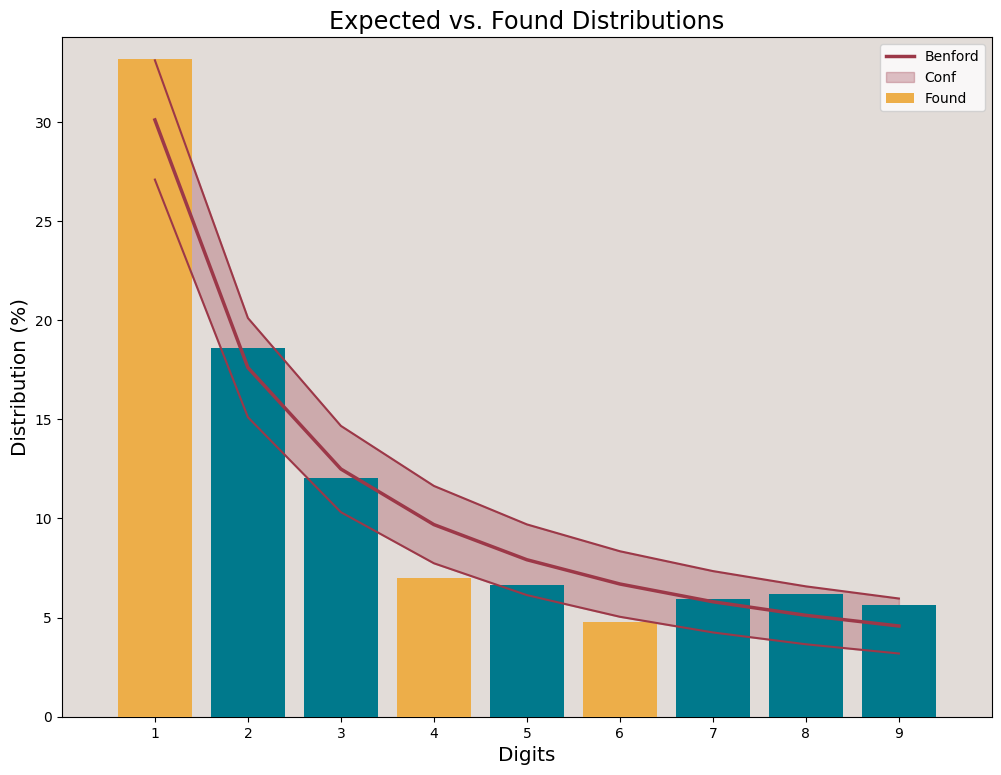

In [40]:
CData_Stack = COVID_for_Pres.stack().reset_index()
ben = benford.Benford(CData_Stack[0], decimals=8)
ben.update_confidence(99, tests=['F1D', 'L1D'])
ben.F1D.report()

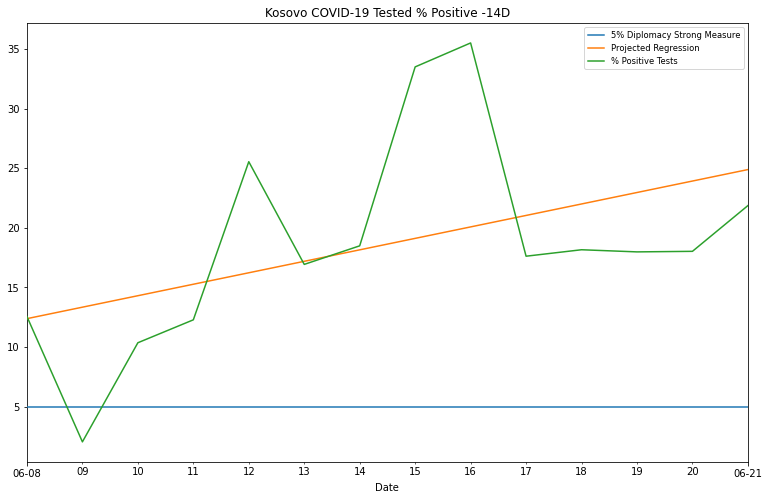

In [46]:
%matplotlib agg
deltaFig = COVID_for_Pres.Tested_Positive_Ratio.plot(title='Kosovo COVID-19 % Positive Tests -L{0} Days'.format(TDays), label='Positive Cases', zorder=10)
Y = COVID_for_Pres.Tested_Positive_Ratio.last(TDays).values.reshape(-1, 1)
X = COVID_for_Pres.last(TDays).index.map(datetime.datetime.toordinal).values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
CPDelta_df = COVID_for_Pres[['Tested_Positive_Ratio']].last(TDays)
CPDelta_df.insert(0, 'LinReg', Y_pred, True)
CPDelta_df.insert(0, '5%_Dip_Strong', 5, True)
%matplotlib inline
deltaFig = CPDelta_df.plot(title='Kosovo COVID-19 Tested % Positive -{0}'.format(TDays), zorder=10)
deltaFig.xaxis.set_major_formatter(tickFormatter)
deltaFig.legend(['5% Diplomacy Strong Measure', 'Projected Regression', '% Positive Tests'], fontsize='small')
deltaFig.figure.tight_layout()
deltaFig.figure.set_size_inches(11.5, 8)

<ipython-input-50-f5831f3487cb>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  deltaFig.set_yticklabels(['0', '0', '1', '10', '100', '1000'])


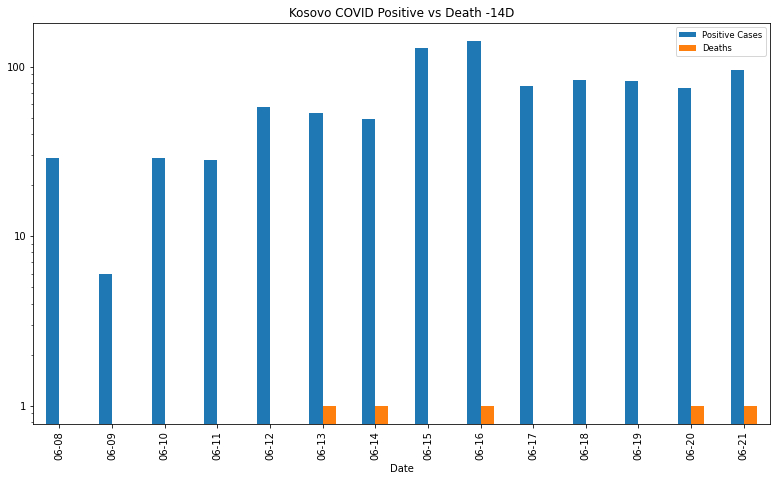

In [50]:
CPDelta_df = COVID_for_Pres[['Positive_Raw', 'Died_Raw']].last(TDays)
ticks = CPDelta_df.index.strftime('%m-%d').values
deltaFig = CPDelta_df.plot(kind='bar', title='Kosovo COVID Positive vs Death -{0}'.format(TDays), logy=True)
deltaFig.legend(['Positive Cases', 'Deaths'], fontsize='small')
deltaFig.set_xticklabels(ticks)
deltaFig.set_yticklabels(['0', '0', '1', '10', '100', '1000'])
deltaFig.figure.tight_layout()
deltaFig.figure.set_size_inches(11.5, 8)

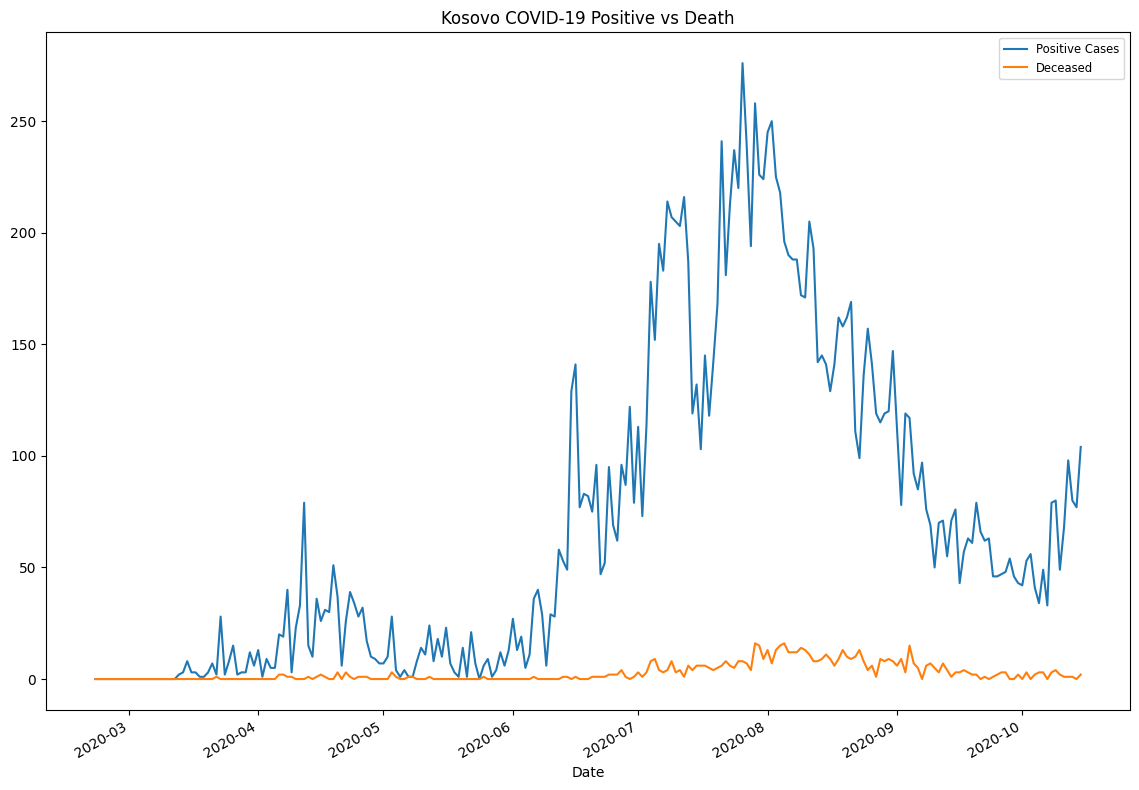

In [74]:
CPDelta_df = COVID_Raw[['Positive_Raw', 'Died_Raw']]
deltaFig = CPDelta_df.plot(title='Kosovo COVID-19 Positive vs Death')
deltaFig.figure.set_size_inches(11.5, 8)
deltaFig.legend(['Positive Cases', 'Deceased'], fontsize='small')
deltaFig.figure.tight_layout()

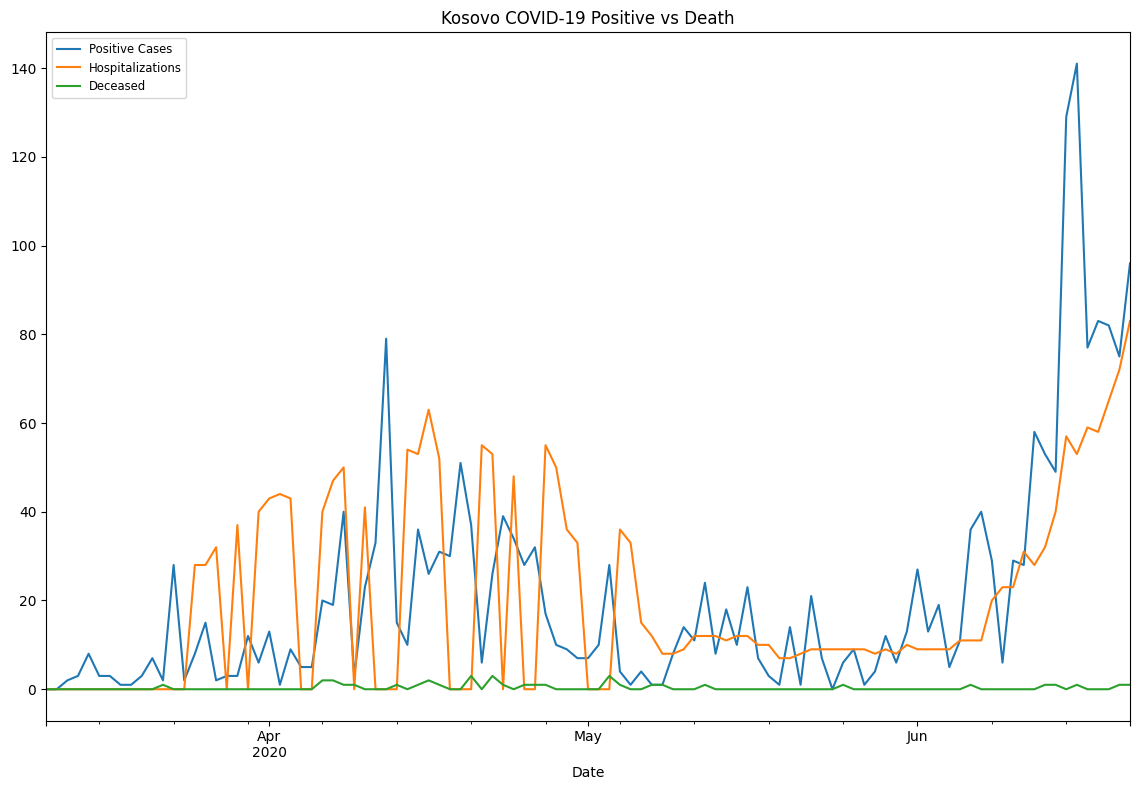

In [75]:
CPDelta_df = COVID_for_Pres[['Positive_Raw', 'Hospitalizations_Raw', 'Died_Raw']]
deltaFig = CPDelta_df.plot(title='Kosovo COVID-19 Positive vs Death')
deltaFig.figure.set_size_inches(11.5, 8)
deltaFig.legend(['Positive Cases', 'Hospitalizations', 'Deceased'], fontsize='small')
deltaFig.figure.tight_layout()